# Algorithms Example

In [1]:
import pandas as pd

# Graduate Admissions
### The following dataset will be used to learn to predict whether a student will be "Admitted" into graduate school. 

# Load and preview data

In [2]:
df = pd.read_csv("grad_admit.csv")
df = df.drop(["Serial No."], axis=1)
df["Admitted"] = df["Admitted"].map({"No": 0, "Yes": 1})
df.head(11)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,3.89,1,1
1,324,107,4,4.0,4.5,3.58,1,1
2,316,104,3,3.0,3.5,3.23,1,0
3,322,110,3,3.5,2.5,3.50,1,1
4,314,103,2,2.0,3.0,3.31,0,0
5,330,115,5,4.5,3.0,3.77,1,1
6,321,109,3,3.0,4.0,3.31,1,1
7,308,101,2,3.0,4.0,3.19,0,0
8,302,102,1,2.0,1.5,3.23,0,0
9,323,108,3,3.5,3.0,3.47,0,0


---

# Data Preparation

## Separate the data into X (features) and y (target).

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
X[:10]

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   3.89,   1.  ],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   3.58,   1.  ],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   3.23,   1.  ],
       [322.  , 110.  ,   3.  ,   3.5 ,   2.5 ,   3.5 ,   1.  ],
       [314.  , 103.  ,   2.  ,   2.  ,   3.  ,   3.31,   0.  ],
       [330.  , 115.  ,   5.  ,   4.5 ,   3.  ,   3.77,   1.  ],
       [321.  , 109.  ,   3.  ,   3.  ,   4.  ,   3.31,   1.  ],
       [308.  , 101.  ,   2.  ,   3.  ,   4.  ,   3.19,   0.  ],
       [302.  , 102.  ,   1.  ,   2.  ,   1.5 ,   3.23,   0.  ],
       [323.  , 108.  ,   3.  ,   3.5 ,   3.  ,   3.47,   0.  ]])

In [5]:
y[:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

---

# Train-Test Split

## Split the data into train and test sets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [7]:
X_train.shape, X_test.shape

((280, 7), (120, 7))

## Standardize the data

In [7]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

---

# Machine Learning Algorithms

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
log_reg.score(X_test_std, y_test)

0.9

### probabilities of the predictions

In [9]:
log_reg.predict(X_test_std)[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [10]:
log_reg.predict_proba(X_test_std)[:10]

array([[0.62226856, 0.37773144],
       [0.87791276, 0.12208724],
       [0.11002985, 0.88997015],
       [0.14021223, 0.85978777],
       [0.03263393, 0.96736607],
       [0.93619671, 0.06380329],
       [0.93268541, 0.06731459],
       [0.99714618, 0.00285382],
       [0.99897146, 0.00102854],
       [0.00163955, 0.99836045]])

---

## Support Vector Machine

In [11]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_std, y_train)
svm.score(X_test_std, y_test)

0.9

---

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train_std, y_train)
d_tree.score(X_test_std, y_test)

0.8083333333333333

#### Visualize the Decision Tree

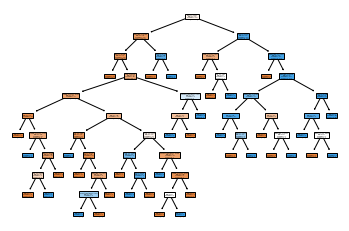

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree
feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'GPA','Research']
tree.plot_tree(d_tree,
              feature_names=feature_names,
               filled=True);

---

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train_std, y_train)
forest.score(X_test_std, y_test)

0.8416666666666667

---

## K-nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test)

0.8666666666666667